In [1]:
import datetime

In [2]:
import sklearn
import pandas as pd
import numpy as np

In [3]:
from IPython.display import HTML

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [5]:
import holoviews as hv
%load_ext holoviews.ipython

In [6]:
train = pd.read_csv('../data/train.csv', encoding="utf-8")

In [7]:
test = pd.read_csv('../data/genuinetest.csv', encoding="utf-8")

In [8]:
print(train)

      Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  \
0      0  07/17/1999        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   
1      1  02/14/2008          Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   
2      2  03/09/2013      Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   
3      3  02/02/2012           Tokat       Other   IL   6  4.5  6.0  6.0   4   
4      4  05/09/2009       Gaziantep       Other   IL   3  4.0  3.0  4.0   2   
5      5  02/12/2010          Ankara  Big Cities   FC   6  6.0  4.5  7.5   8   
6      6  10/11/2010        İstanbul  Big Cities   IL   2  3.0  4.0  4.0   1   
7      7  06/21/2011        İstanbul  Big Cities   IL   4  5.0  4.0  5.0   2   
8      8  08/28/2010  Afyonkarahisar       Other   IL   1  1.0  4.0  4.0   1   
9      9  11/16/2011          Edirne       Other   IL   6  4.5  6.0  7.5   6   
10    10  08/09/2013         Kocaeli       Other   FC   9  6.0  6.0  6.0   4   
11    11  05/22/2012        İstanbul  Bi

In [9]:
end_dt = datetime.datetime.strptime('2015-1-1', "%Y-%m-%d")
train['Age'] = [(end_dt - datetime.datetime.strptime(open_dt, "%m/%d/%Y")).days for open_dt in train['Open Date']]
test['Age']  = [(end_dt - datetime.datetime.strptime(open_dt, "%m/%d/%Y")).days for open_dt in test['Open Date']]

In [10]:
hvtrain = hv.DFrame(train)

In [11]:
train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'Age'], dtype='object')

In [12]:
%output holomap='widgets'

:HoloMap   [Column]
   :Scatter   [P9]   (revenue)
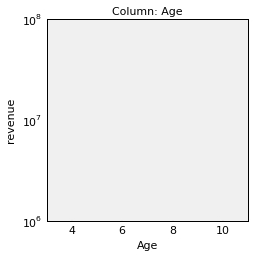
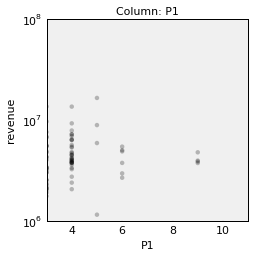
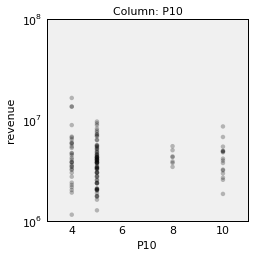
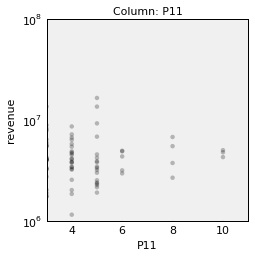
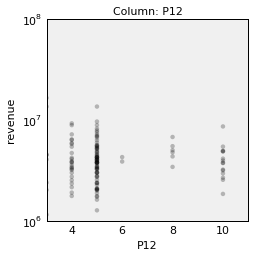
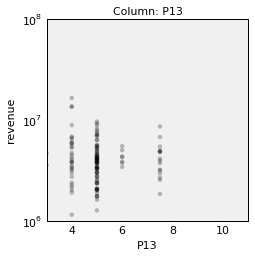
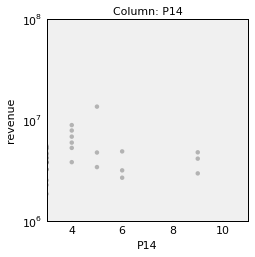
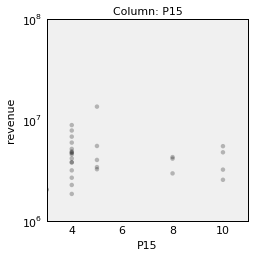
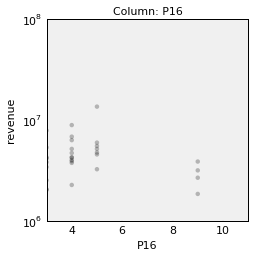
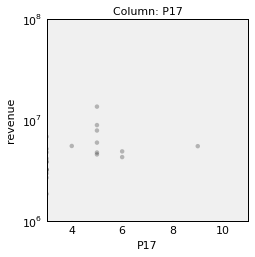
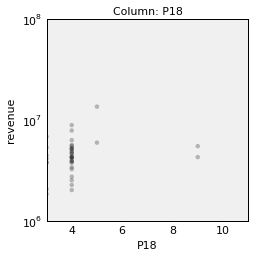
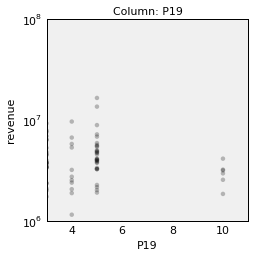
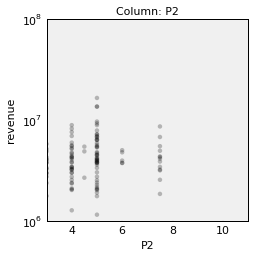
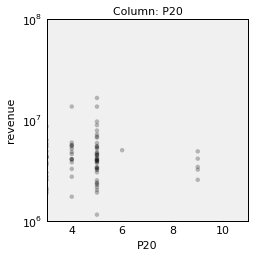
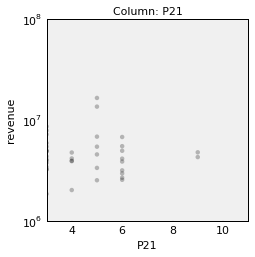
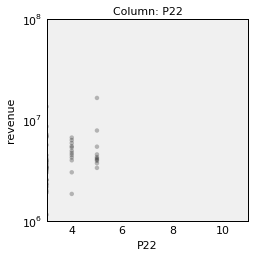
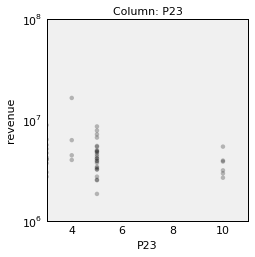
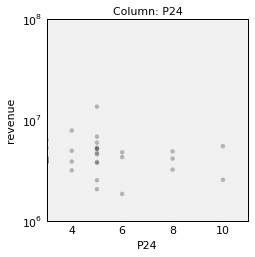
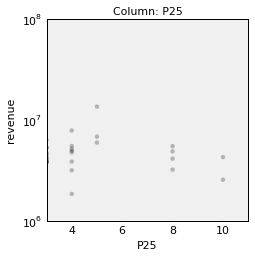
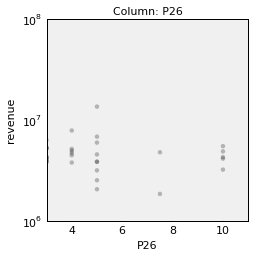
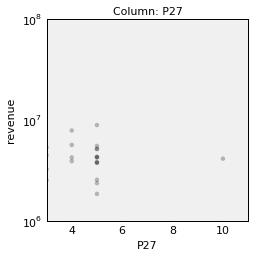
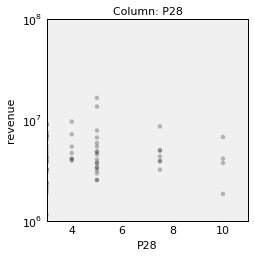
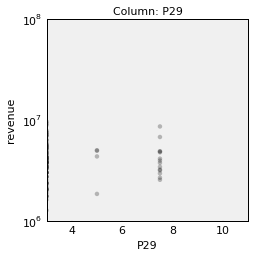
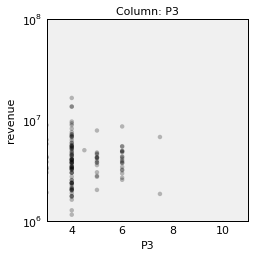
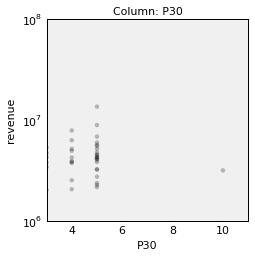
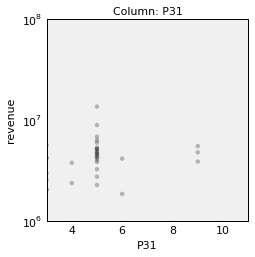
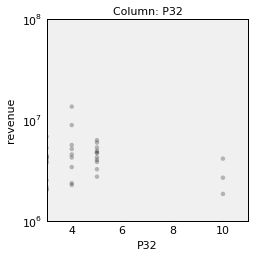
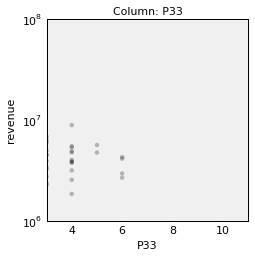
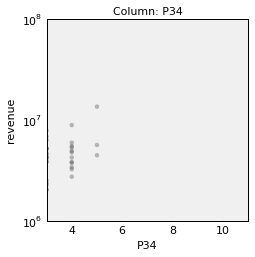
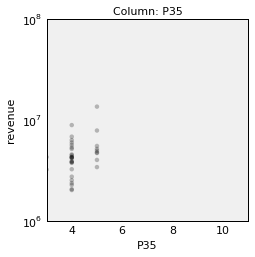
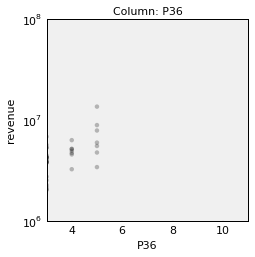
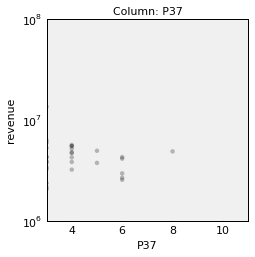
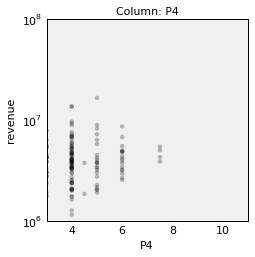
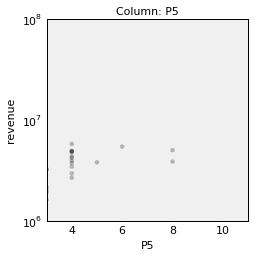
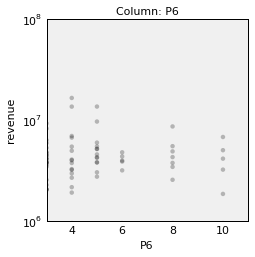
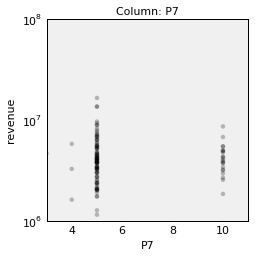
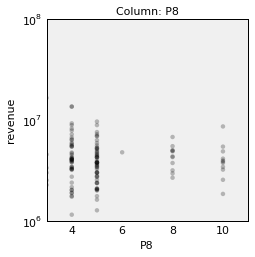
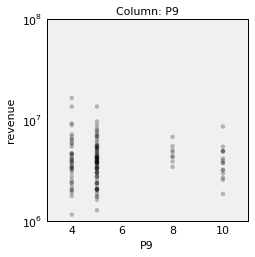

In [13]:
%%opts Scatter [logy=True apply_ranges=False] (alpha=0.25, color=[0,0,0])
cols = ['P'+str(i) for i in range(1,38)]
cols.append('Age')
hv.HoloMap([(col, hvtrain.scatter(col,'revenue', reduce_fn=np.mean)) for col in cols], key_dimensions=['Column'])